# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

Probabilities:
Chance of Winning if You Stay:  0.3397
Chance of Winning if You Switch:  0.6603


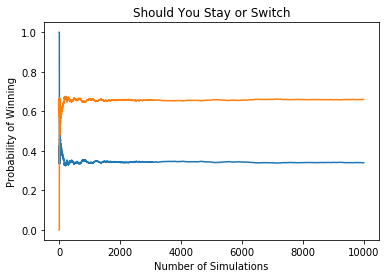

In [23]:
# Your code here
#P(There is a car|You picked the correct door)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

p_a = 1/3
p_acomp = 2/3
p_b = 1/3
p_bcomp = 2/3
p_b_giv_a = (p_a*p_b)/p_a

def bayes(P_a, P_b, P_b_given_a):
    # Your code here
    P_a_given_b = (P_b_given_a * P_a)/P_b
    return P_a_given_b


stay = []
switch = []
for i in range(10**4):
    car = int(np.random.choice(range(1,4,1)))
    player_selection = int(np.random.choice(range(1,4,1)))
    goats = [door for door in [1,2,3] if door != car and 
             door != player_selection]
    door_revealed = np.random.choice(goats)
    wrong_door = [door for door in [1,2,3] if door != player_selection and 
                  door != door_revealed][0]
    if wrong_door == car:
        switch.append(1)
    
    else:
        switch.append(0)
        
    if player_selection == car:
        stay.append(1)
    else:
        stay.append(0)
    
plt.plot(range(1,(10**4)+1), [np.mean(stay[:i]) for i in range(1,10**4+1)], 
         label= 'Stay')
plt.plot(range(1,(10**4)+1), [np.mean(switch[:i]) for i in range(1,(10**4)+1)],
         label= 'Switch')
plt.ylabel('Probability of Winning')
plt.xlabel('Number of Simulations')
plt.title('Should You Stay or Switch')
plt.legend

print('Probabilities:')
print('Chance of Winning if You Stay: ', np.mean(stay))
print('Chance of Winning if You Switch: ', np.mean(switch))        


    






## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 